# IRIS - Kind of Species Detection
In this project we are going to implement two major machine learning algorithms namely <u><b>Naive Bayes Algorithm</b></u> and <u><b>K-Nearest Neighbour Algorithm</b></u> on IRIS dataset and compare both algorithms side by side while testing them on multiple bench marks like
confussion matrix, accuracy, precision, recall score and F1-score.
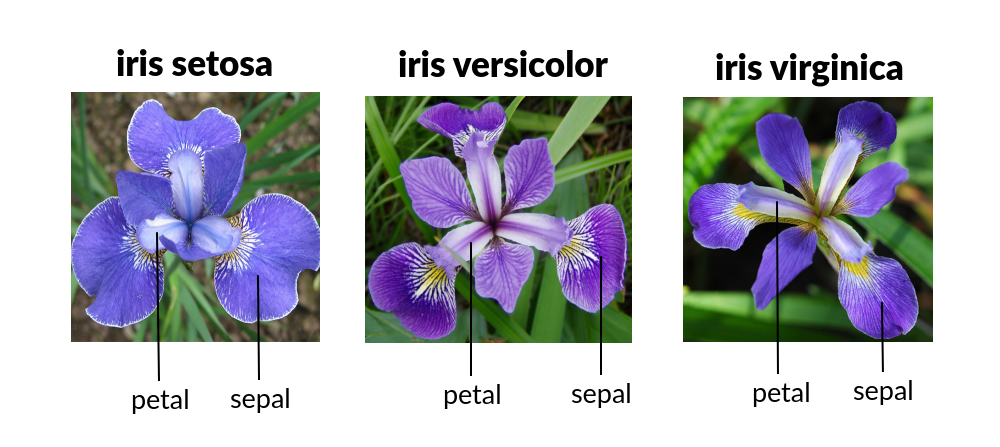

In [2]:
# importing required libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# libreries for testing the performance of algorithms
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

# ML Model libreries
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
# reading excel file
iris = pd.read_excel('iris_dataset.xls')
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# shape of data set
iris.shape

(150, 5)

In [5]:
# checking unique elements in Species column
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
# showing some basic statistical values
iris.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
# checking for types of data type present in the dataframe
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# total number of null values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## 2.Data Visualization

### 2.1 Scatter Plot
Scatter plot is being used to illustrate the two variables of length and width in Sepals and Petals.

#### 2.1.1 Sepal Width vs Sepal Length

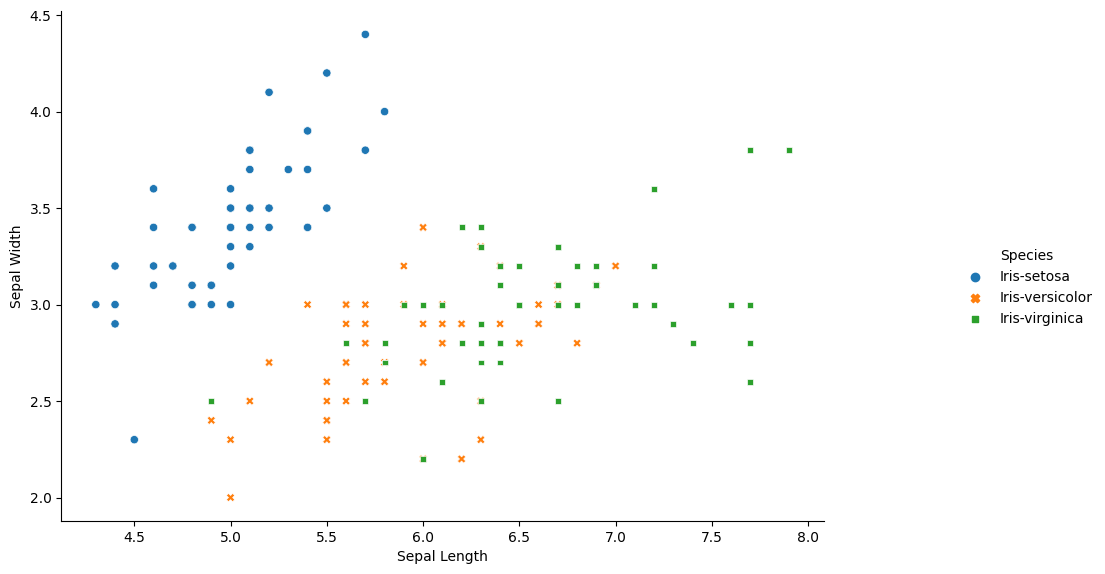

In [9]:
p = sns.relplot(x='SepalLengthCm', y='SepalWidthCm', data=iris, hue='Species', style='Species')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
p.fig.set_size_inches(12,6)
plt.show()

#### 2.1.2 Petal Width vs Petal Length

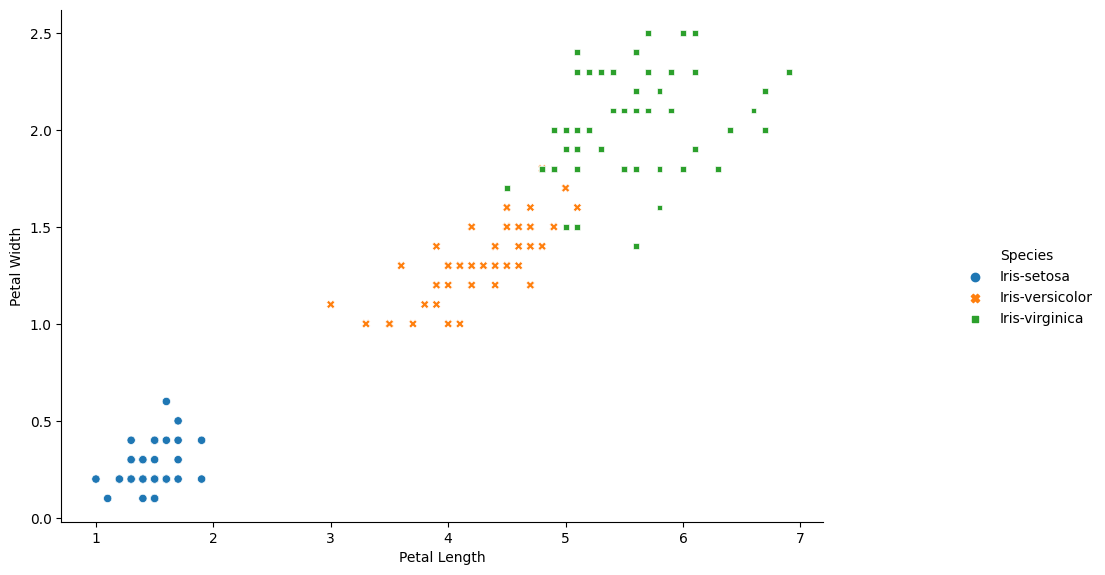

In [10]:
p = sns.relplot(x='PetalLengthCm', y='PetalWidthCm', data=iris, hue='Species', style='Species')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
p.fig.set_size_inches(12,6)
plt.show()

As we can see in both scatterplot 2.1.1 and 2.1.2 it is clearliy visible that there is more division between multiple species in petal width vs petal length.

### 2.2 Pairplot
To visualize relationships between each variable. It produces a matrix of relationships between each variable in your data for an instant examination of our data. pair plot gives scatter plot of different features

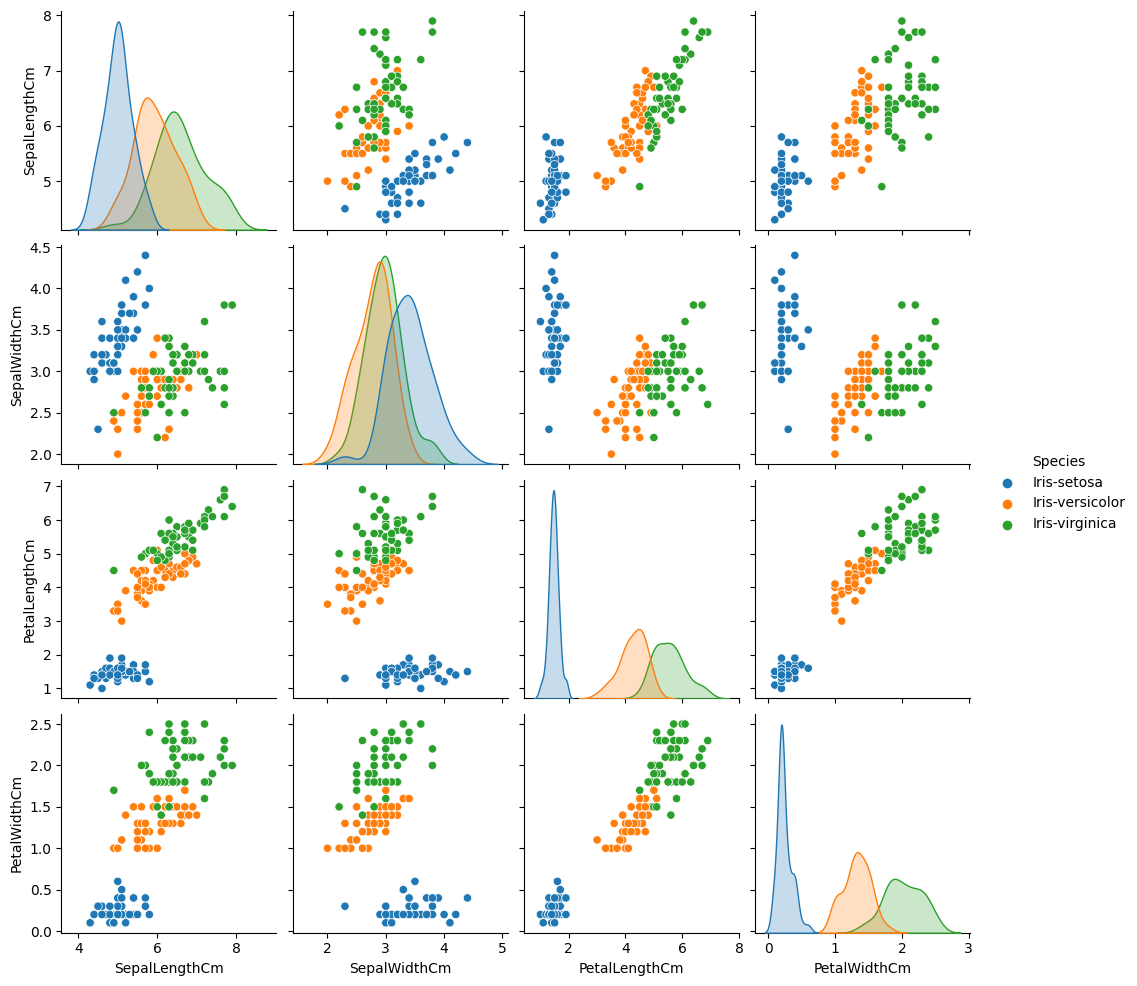

In [11]:
sns.pairplot(iris, hue="Species")
plt.show()

### 2.3 Box Plot
boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped.

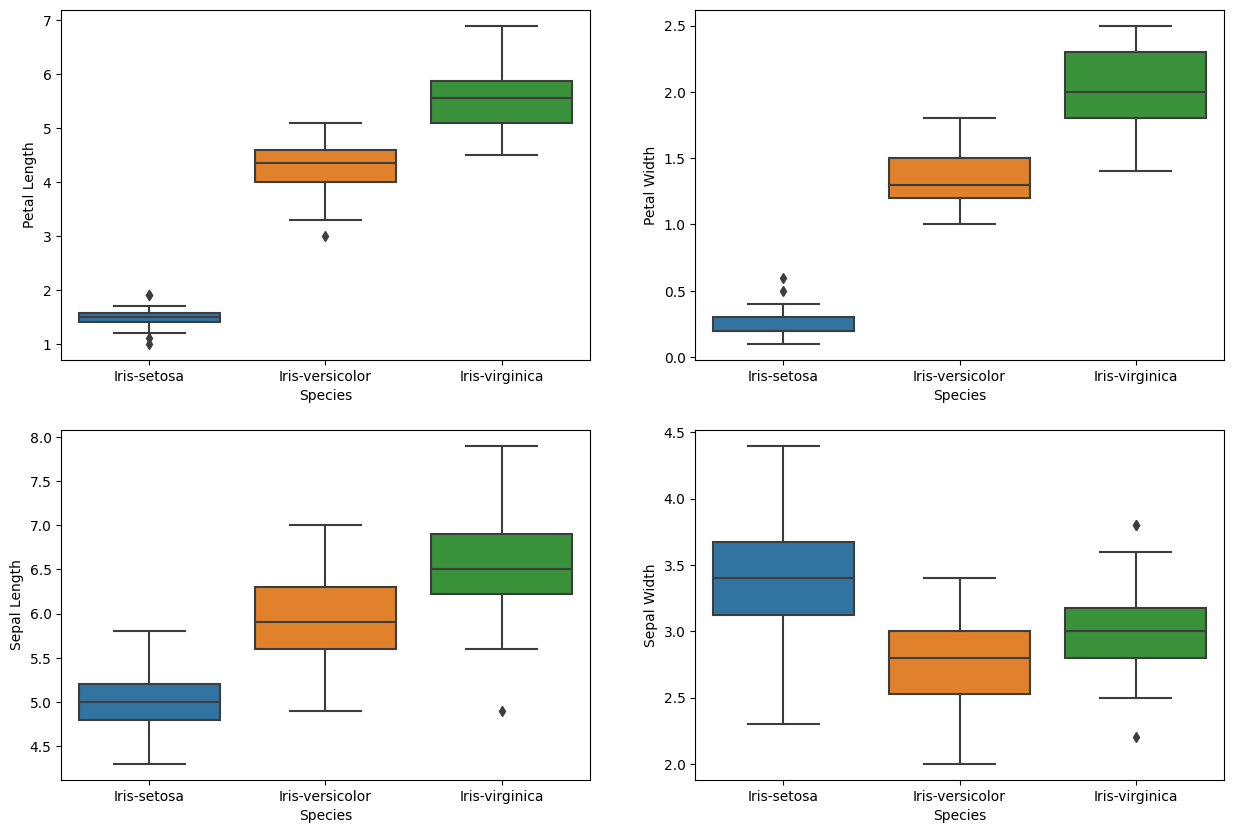

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)
plt.ylabel("Petal Length")

plt.subplot(2,2,2)
sns.boxplot(x='Species', y='PetalWidthCm', data=iris)
plt.ylabel("Petal Width")

plt.subplot(2,2,3)
sns.boxplot(x='Species', y='SepalLengthCm', data=iris)
plt.ylabel("Sepal Length")

plt.subplot(2,2,4)
sns.boxplot(x='Species', y='SepalWidthCm', data=iris)
plt.ylabel("Sepal Width")

plt.show()

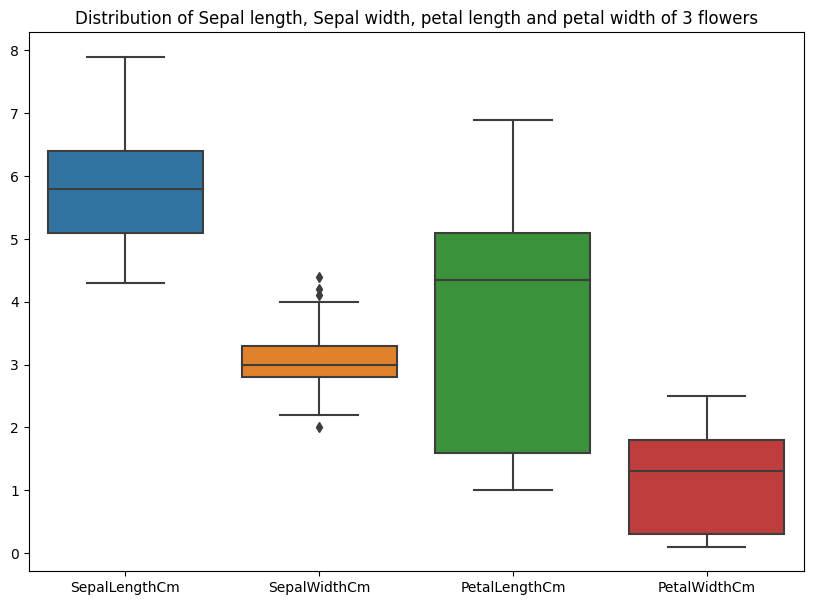

In [13]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=iris).set_title("Distribution of Sepal length, Sepal width, petal length and petal width of 3 flowers")
plt.show()

### 2.4 Area Plot
Area plot is used to visualize dimensions of sepals and petals provided in the dataset.

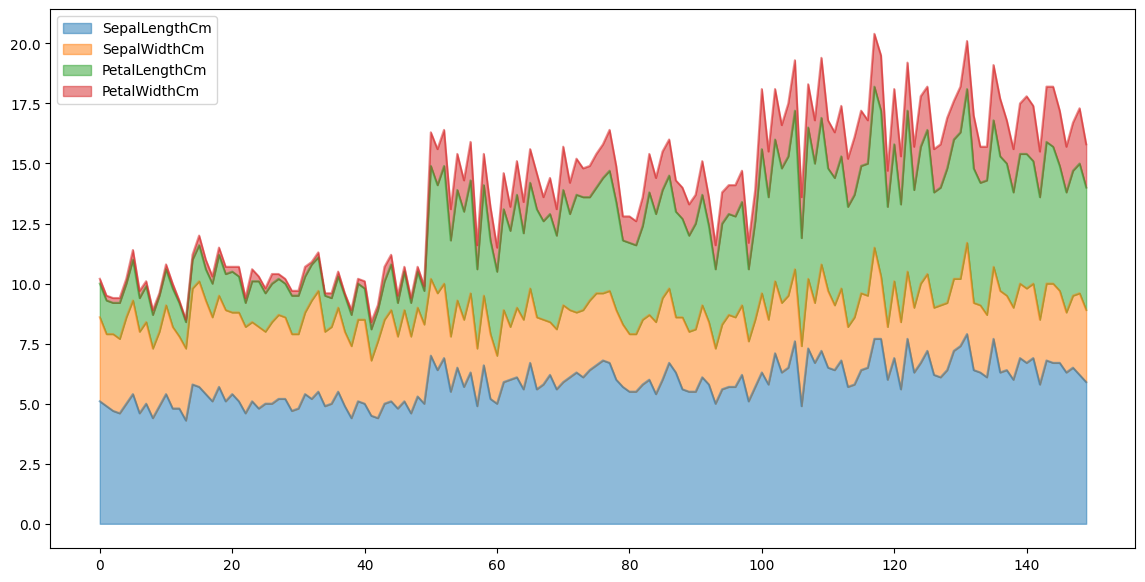

In [14]:
iris.plot.area(y = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'], alpha=0.5, figsize=(14, 7));

To see the correlation between the variables

In [15]:
iris.corr()

/tmp/ipykernel_22455/2141086772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


#### Heat Map of correlation

/tmp/ipykernel_22455/1032920121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot = True)


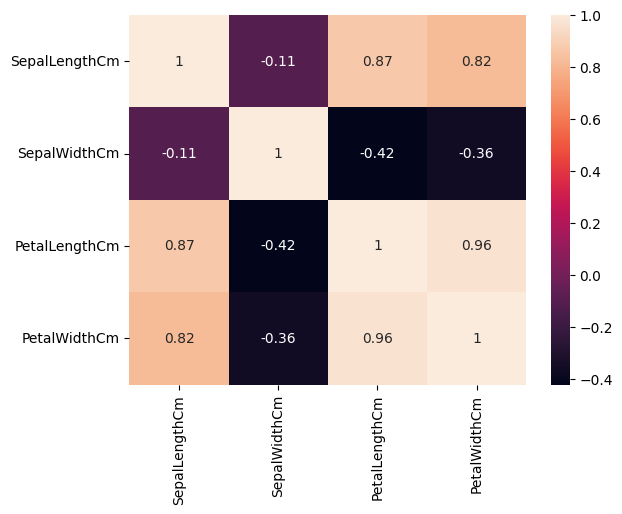

In [16]:
sns.heatmap(iris.corr(),annot = True)
plt.show()

In [17]:
# Labels
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

In [18]:
#Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 3. Machine Learning Models
In the below operations we are going to use two major mahine learning algorithms, Which are Naive Baye's algorithm and k-Nearest Neighbor.

## 3.1 Naive Bayes Classifier

<br>Bayes' theorem is used to determine the probability of a hypothesis with prior knowledge. It depends on the conditional probability.
<br>The formula for Bayes' theorem is given as:
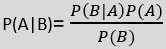

#### Advantages of Naive Bayes
It is simple and easy to implement.
<br>Doesn't require as much training data.
<br>Handles both continuous and discrete data.
<br>Highly scalable with the number of predictors and data points.
<br>It is fast and can be used to make real-time predictions.

#### Disadvantages of Naive Bayes
Conditional Independence Assumption does not always hold. In most situations, the feature show some form of dependency.
<br>Zero probability problem : When we encounter words in the test data for a particular class that are not present in the training data, we might end up with zero class probabilities.

#### Some applications on Naive Bayes
E-mail spam detection.
<br> Medical data classification.
<br> Credit card scoring.

In [19]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_predict = gaussian.predict(X_test) 
accuracy_nb = round(accuracy_score(y_test, Y_predict)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_predict)
accuracy = accuracy_score(y_test, Y_predict)
precision =precision_score(y_test, Y_predict, average='micro')
recall =  recall_score(y_test, Y_predict, average='micro')
f1 = f1_score(y_test, Y_predict, average='micro')

print('Confusion matrix for Naive Bayes\n',cm)
print('Accuracy of Naive Bayes : %.3f' %accuracy)
print('Precision of Naive Bayes: %.3f' %precision)
print('Recall of Naive Bayes   : %.3f' %recall)
print('F1-score of Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Accuracy of Naive Bayes : 1.000
Precision of Naive Bayes: 1.000
Recall of Naive Bayes   : 1.000
F1-score of Naive Bayes : 1.000


## 3.2 KNN (K-Nearest Neighbor)
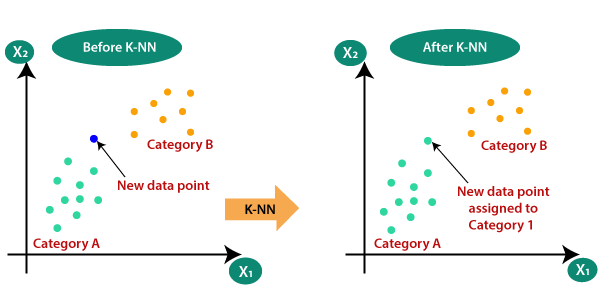
The <b>K-NN</b> working can be explained on the basis of the below algorithm:

Step-1: Select the number K of the neighbors
<br>Step-2: Calculate the Euclidean distance of K number of neighbors
<br>Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
<br>Step-4: Among these k neighbors, count the number of the data points in each category.
<br>Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
<br>Step-6: Our model is ready.

#### Advantages of KNN Algorithm:
<br> 1.It is simple to implement.
<br> 2.It is robust to the noisy training data
<br> 3.It can be more effective if the training data is large.
#### Disadvantages of KNN Algorithm:
<br> 1.Always needs to determine the value of K which may be complex some time.
<br> 2.The computation cost is high because of calculating the distance between the data points for all the training samples.

####  Some of the applications of KNN:
Calculating Credit Ratings
<br>Image recognition
<br>Recommendation System

In [20]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall = recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('Accuracy of KNN  : %.3f' %accuracy)
print('Precision of KNN : %.3f' %precision)
print('Recall of KNN    : %.3f' %recall)
print('F1-score of KNN  : %.3f' %f1)

Confusion matrix for KNN
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy of KNN  : 0.978
Precision of KNN : 0.978
Recall of KNN    : 0.978
F1-score of KNN  : 0.978


# Conclusion

In [21]:
# dataframe to store the 
results = pd.DataFrame({
    'Model': [ 'KNN', 
              'Naive Bayes'],
    'Score': [ acc_knn, 
              acc_gaussian],
    "Accuracy_score":[accuracy_knn,
                      accuracy_nb
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(5)

,Model,Score,Accuracy_score
0,Naive Bayes,94.29,100.00
1,KNN,96.19,97.78


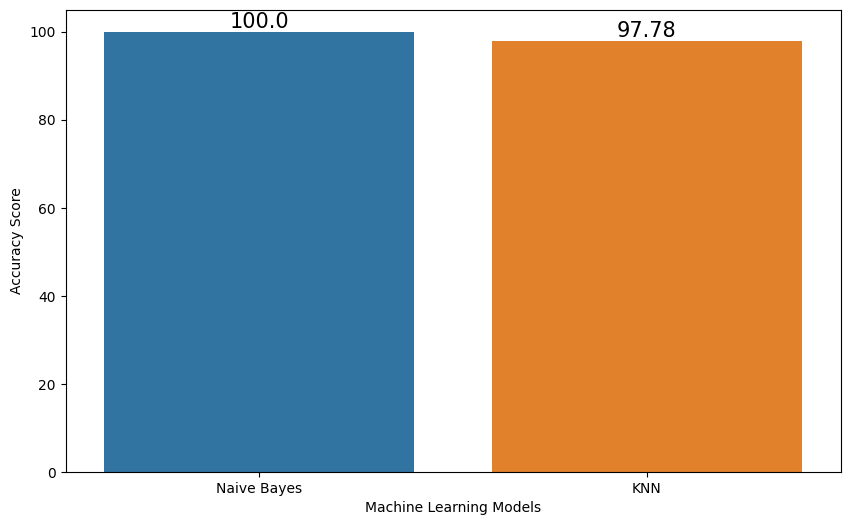

In [22]:
plt.subplots(figsize=(10,6))
ax = sns.barplot(x='Model', y="Accuracy_score",data=result_df)
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Score")
labels = (result_df["Accuracy_score"])

# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

# Observations

The correlation between Petal Width and Length was very high. Thus we have just implemented some of the common Machine Learning. 
The aaccuracy of Naivr Bayes in this perticular case is higher when compared to KNN.

**Splitting data with random_state = 42**

In [23]:
#Train and Test split with random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_predict = gaussian.predict(X_test) 
accuracy_nb = round(accuracy_score(y_test, Y_predict)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_predict)
accuracy = accuracy_score(y_test, Y_predict)
precision =precision_score(y_test, Y_predict, average='micro')
recall =  recall_score(y_test, Y_predict, average='micro')
f1 = f1_score(y_test, Y_predict, average='micro')

print('Confusion matrix for Naive Bayes\n',cm)
print('Accuracy of Naive Bayes : %.3f' %accuracy)
print('Precision of Naive Bayes: %.3f' %precision)
print('Recall of Naive Bayes   : %.3f' %recall)
print('F1-score of Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Accuracy of Naive Bayes : 0.978
Precision of Naive Bayes: 0.978
Recall of Naive Bayes   : 0.978
F1-score of Naive Bayes : 0.978


In [25]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall = recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('Accuracy of KNN  : %.3f' %accuracy)
print('Precision of KNN : %.3f' %precision)
print('Recall of KNN    : %.3f' %recall)
print('F1-score of KNN  : %.3f' %f1)

Confusion matrix for KNN
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy of KNN  : 1.000
Precision of KNN : 1.000
Recall of KNN    : 1.000
F1-score of KNN  : 1.000


In [26]:
# dataframe to store the 
results = pd.DataFrame({
    'Model': [ 'KNN', 
              'Naive Bayes'],
    'Score': [ acc_knn, 
              acc_gaussian],
    "Accuracy_score":[accuracy_knn,
                      accuracy_nb
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(5)

,Model,Score,Accuracy_score
0,KNN,94.29,100.00
1,Naive Bayes,94.29,97.78


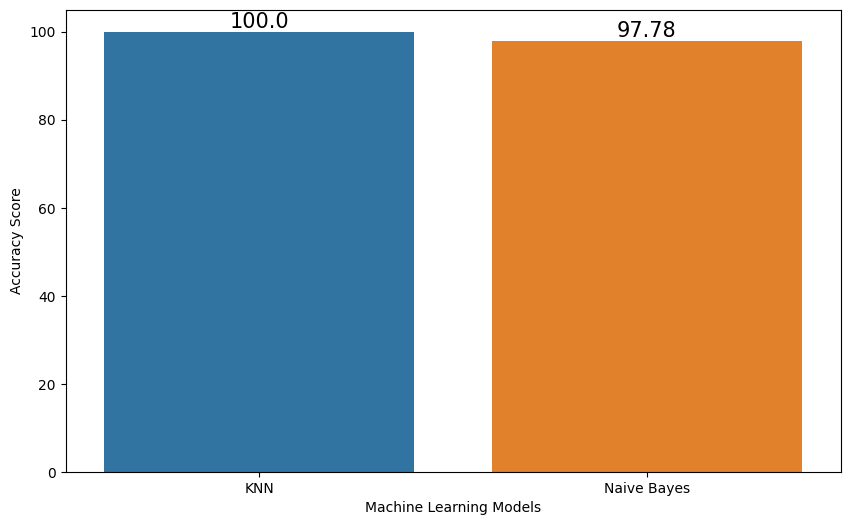

In [27]:
plt.subplots(figsize=(10,6))
ax = sns.barplot(x='Model', y="Accuracy_score",data=result_df)
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Score")
labels = (result_df["Accuracy_score"])

# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')